# Mall Customers

In [4]:
import warnings
warnings.filterwarnings("ignore")


# STANDARD LIBRARIES
import pandas as pd
import numpy as np
import os

# THIRD PARTY LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

# LOCAL LIBRARIES
import env
import acquire
import wrangle
import explore

In a seperate notebook, use the functions you have developed in the explore exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. 
- Make spending_score your target variable.

In [5]:
def get_mall_data(use_cache=True):
    filename = 'mall_customers.csv'
    
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
    
    
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/mall_customers'
    query = '''
    SELECT *
        FROM customers
        
    '''

    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, url)
    print('Saving to csv...')
    df.to_csv(filename, index=False)
    return df

In [8]:
df = get_mall_data(use_cache=True)
df.head()

Reading from csv file...


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.shape

(200, 5)

In [12]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
train, validate, test = wrangle.data_split(df, 'spending_score')

train -> (112, 4)
validate -> (48, 4)
test -> (40, 4)


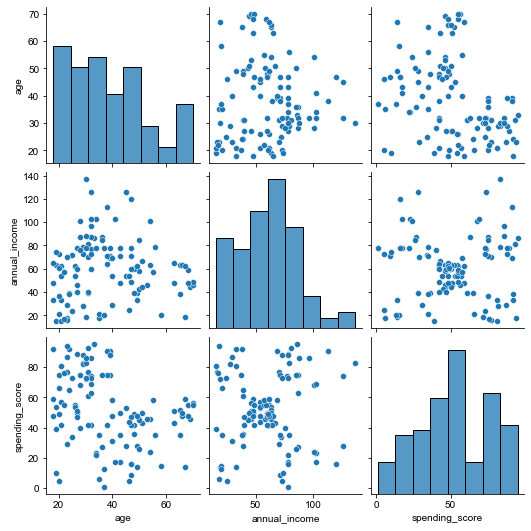

In [18]:
explore.plot_variable_pairs(train)

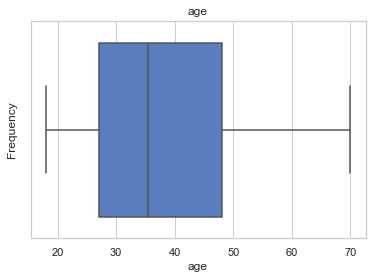

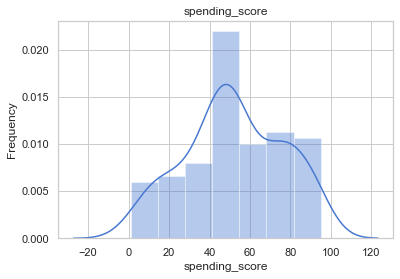

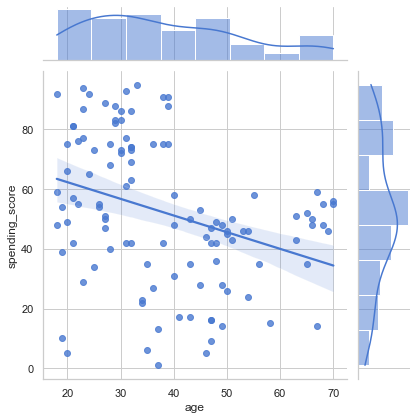

,gender,age,annual_income,spending_score
123,Male,39,69,91
76,Female,45,54,53
171,Male,28,87,75
10,Male,67,19,14
35,Female,21,33,81
...,...,...,...,...
175,Female,30,88,86
101,Female,49,62,48
148,Female,34,78,22
99,Male,20,61,49


In [24]:
explore.plot_categorical_and_continuous(train, 'age', 'spending_score')